In [229]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from scipy import linalg as la

### Task 25
SVD and QR factorization

$A = QR$ such that $Qy = b$ and $Rx = y$

$Q$ is orthonormal and $R$  is upper triangular

In [230]:
def is_ortogonal(M):
    I1 = np.transpose(M) @ M
    I1 = I1.round(0)
    I2 = np.eye(len(I1), len(I1[0]))

    if np.array_equal(I1, I2):
        return True
    else:
        return False

In [231]:
m = 8
n = 4

QR decomposition
$A = U \Sigma V^{T}$. The values $\sigma_{i}$ of $\Sigma$ are called singular values.
$U$ is orthogonal.

In [232]:
A = np.random.rand(m,n)
Q_np, R_np = np.linalg.qr(A, 'reduced')
Q_sp, R_sp = la.qr(A, mode='economic')

print("Q_np is othogonal: ", is_ortogonal(Q_np))
print("Q_sp is othogonal: ", is_ortogonal(Q_sp))

Q_np is othogonal:  True
Q_sp is othogonal:  True


Reduced mode (numpy) returns Q and R with dimensions $(M, K)$ $(K, N)$ whereas $K = min(N, M)$
and in economic mode (scipy) the shapes of $Q$ and $R$ are $(M, K)$ and $(K, N)$ instead of $(M,M)$ and $(M,N)$, with $K=min(M,N)$.

SVD (Single Value Decomposition)

In [233]:
U_np, E_np, V_np = np.linalg.svd(A)
U_sp, E_sp, V_sp = la.svd(A)

print("U_np is othogonal: ", is_ortogonal(U_np))
print("U_sp is othogonal: ", is_ortogonal(U_sp))

U_np is othogonal:  True
U_sp is othogonal:  True


### Task 27

In [234]:
def partial_Q(x):
    # x - vector of A for Househ. refl.
    # k - column of x in A, index of pivot element
    alpha = -np.sign(x[0]) * la.norm(x) #

    u = np.copy(x)
    u[0] = u[0] - alpha
    u = np.transpose(np.asarray([u/la.norm(u)])) # /la.norm(u)

    return np.eye(u.shape[0]) - 2 * (np.dot(u,np.transpose(u)))


In [235]:
def QR(A):
    n = A.shape[1]
    m = A.shape[0]
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(0,n):

        x = np.copy(R[k:m,k])
        Q_temp = np.eye(m)
        Q_temp[k:m,k:m] = partial_Q(x)

        R = Q_temp @ R
        Q = Q @ np.transpose(Q_temp)
    return Q,R

test_matrix = np.random.rand(8,4)
print(test_matrix)
Q, R = QR(test_matrix)

print("Q is orthogonal: ", is_ortogonal(Q))

[[0.38485093 0.80577351 0.39132219 0.34937189]
 [0.72461931 0.38436483 0.84375086 0.19520031]
 [0.84921269 0.84937328 0.11936641 0.00324464]
 [0.58092228 0.2856959  0.05042163 0.30374349]
 [0.89933177 0.59065498 0.07449148 0.03699315]
 [0.1810946  0.24405875 0.0545388  0.73738519]
 [0.66653427 0.66271868 0.19065656 0.09087275]
 [0.66466759 0.24716335 0.7907287  0.39341636]]
Q is orthogonal:  True


## 28
Matrix compression by SVD.

exponential matrix

In [236]:
def A_exp(m,n):
    A = np.zeros((m,n))
    for i in range(0,m):
        for j in range(0,n):
            A[i,j] = np.exp(-(np.square(i-200)+np.square(j-300))/100)-np.exp(-(np.square(i-350)+np.square(j-100))/400)
    return A

square and rotated square matrices

In [237]:
def A_square(m,n):
    A = np.zeros((m,n))
    B = np.zeros((m,n))
    for i in range(0,m):
        for j in range(0,n):
            if 20<i<70 and 50<j<200:
                A[i,j] = 1
            if  40 < i+j < 120 and 30 > abs(i-j):
                B[i,j] = 1
    return A, B

interaction matrix

In [238]:
def A_multi(m,n,a):
    m_rand = np.asarray(np.random.random((m,2)))
    A = np.zeros((m,n))
    B = np.zeros((m,n))
    C = np.zeros((m,n))
    a_rand = np.asarray(np.random.random((n,2))) + a[0]
    b_rand = np.asarray(np.random.random((n,2))) + a[1]
    c_rand = np.asarray(np.random.random((n,2))) + a[2]
    for i in range(0,m):
        for j in range(0,n):
            A[i,j] = 1/la.norm(m_rand[i,:] - a_rand[j,:])
            B[i,j] = 1/la.norm(m_rand[i,:] - b_rand[j,:])
            C[i,j] = 1/la.norm(m_rand[i,:] - c_rand[j,:])
    return A,B,C

Frobenious norm

In [239]:
def frobenius(M):
    return np.sqrt(np.sum(np.power(M,2)))

compute compressions

In [240]:
def compute_compression(M):
    e = 1e-2
    U, E, V = la.svd(M)
    for i in range(1,len(M[0]) + 1, 1):
        E_v = np.diag(E[0:i])
        A_v = U[:,0:i] @ E_v @ V[0:i,:]
        diff = M - A_v
        if frobenius(diff) < e:
            print("Rows needed: ", str(i))

            # Original Matrix
            plt.matshow(M)

            # Truncated Matrix
            plt.matshow(A_v)

            # Diff
            plt.matshow(diff)
            plt.show()

            break


    ind = [x for x in range(0,len(E))]
    plt.title("Singular values")
    plt.xlabel("index")
    plt.ylabel("singular value")
    plt.plot(ind,E)
    plt.yscale("log")
    plt.show()

call functions

In [241]:
n = 400
m = 600

plot exponential matrix

Rows needed:  2


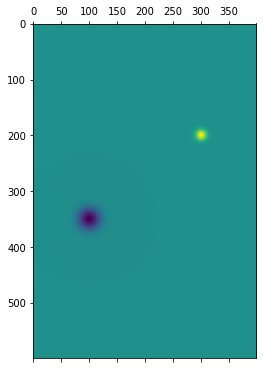

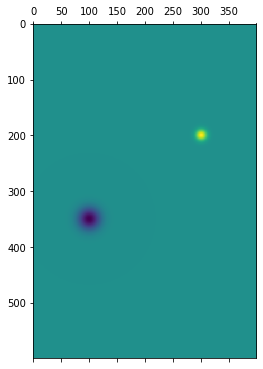

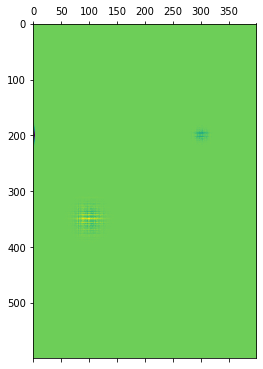

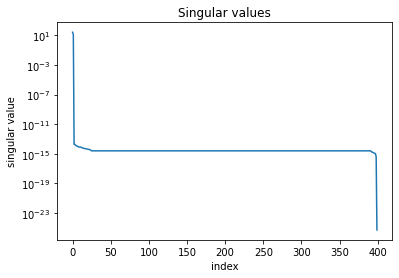

In [242]:
compute_compression(A_exp(m, n))

plot identity matrix

Rows needed:  400


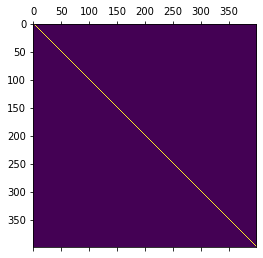

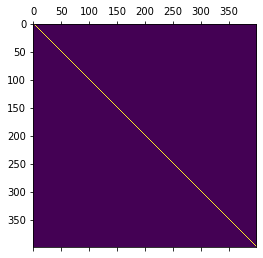

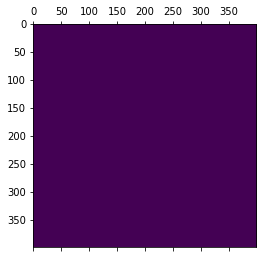

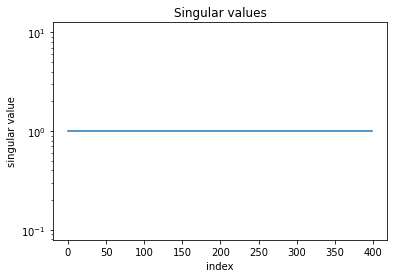

In [243]:
compute_compression(np.identity(n))

plot square matrix

Rows needed:  1
Rows needed:  69


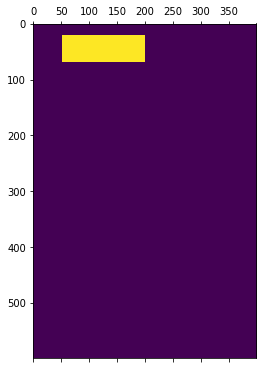

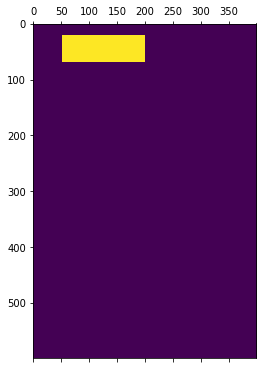

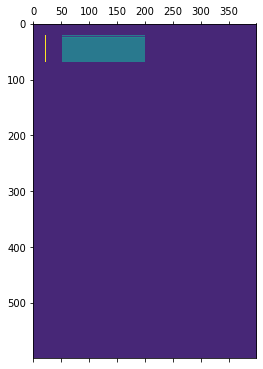

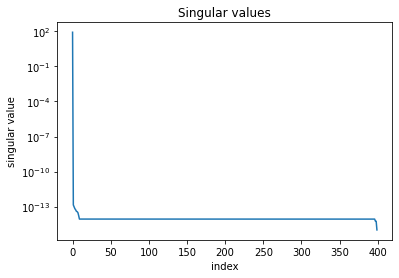

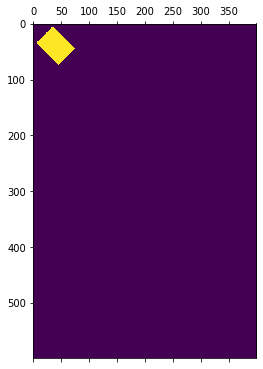

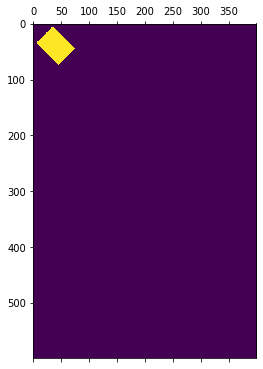

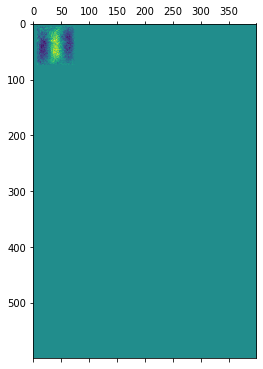

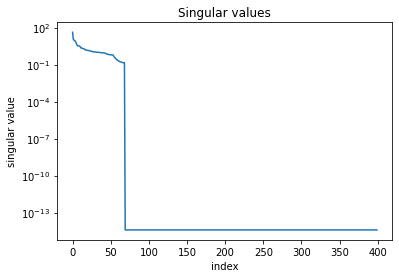

In [244]:
SM, RSM = A_square(m, n)
compute_compression(SM)
compute_compression(RSM)

Plot multi matrix

Rows needed:  6
Rows needed:  3
Rows needed:  3


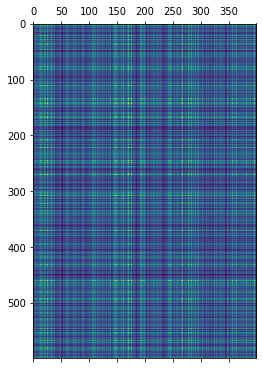

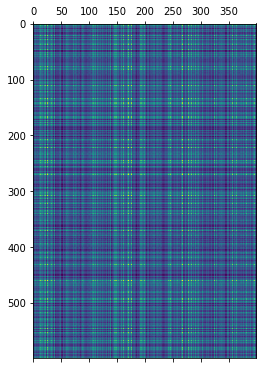

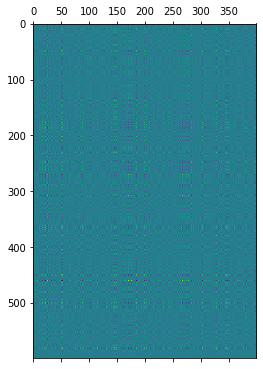

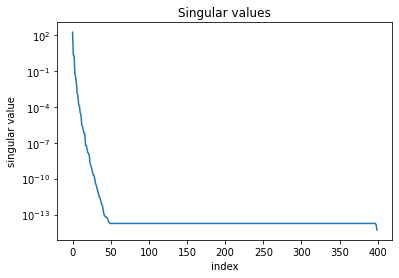

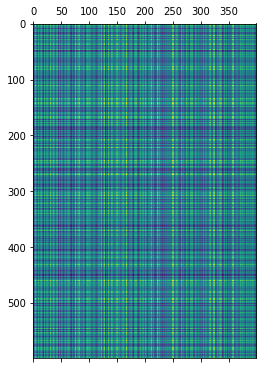

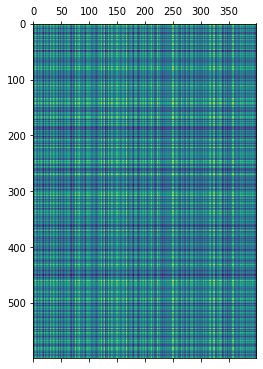

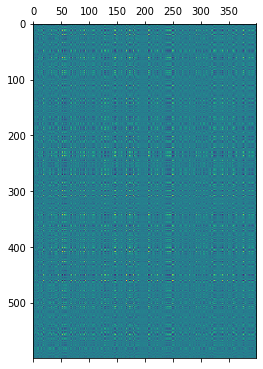

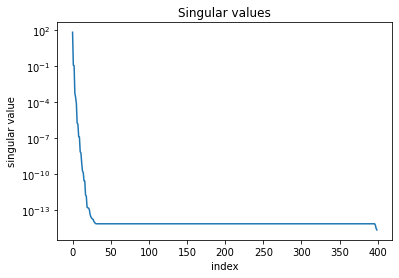

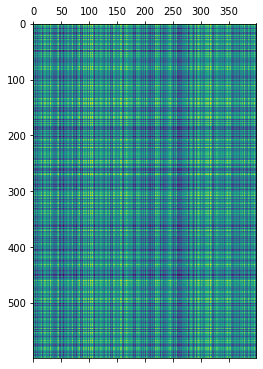

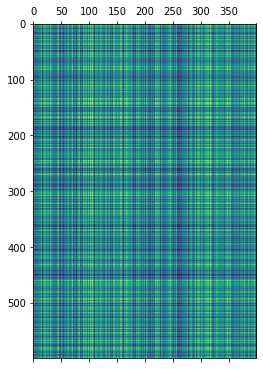

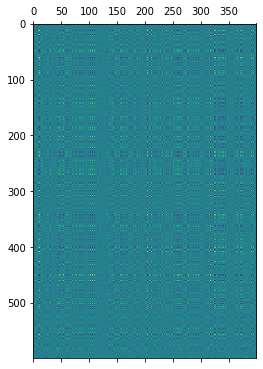

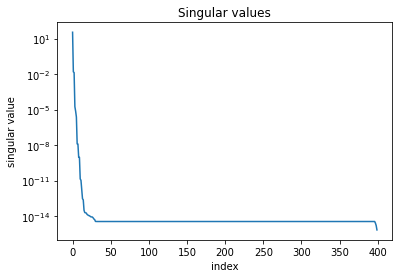

In [245]:
A, B, C = A_multi(m, n, [2, 5, 10])

compute_compression(A)
compute_compression(B)
compute_compression(C)

Plot image compression

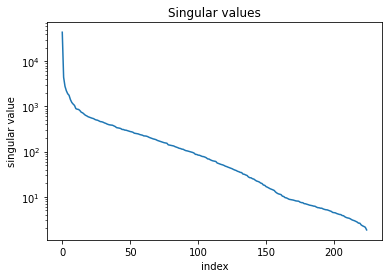

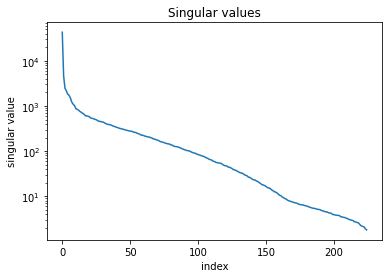

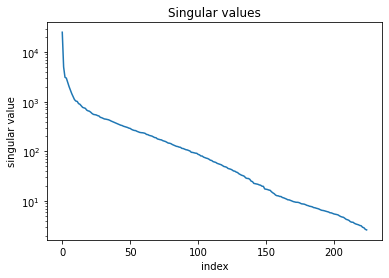

In [246]:
image = img.imread("dog.jpeg")

compute_compression(image[:, :, 0])
compute_compression(image[:, :, 1])
compute_compression(image[:, :, 2])